In [4]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools

from statsmodels.tools.eval_measures import rmse

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

# import the ML algorithm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Pre-Processing

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [23]:
 location = r"C:\Simplilearn\Machine_Learning_May5\Projects\Project 4- California Housing Price Prediction\housing.csv"

In [24]:
# Load the training data from California housing data set
df = pd.read_csv(location)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [26]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
df.shape

(20640, 10)

In [28]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

# Dataset Description :

Field                        Description
1. longitude                  Longitude value for the block in California, USA
2. latitude:                  Latitude value for the block in California, USA
3. housing_median_age:        Median age of the house in the block
4. total_rooms                Count of the total number of rooms (excluding bedrooms) in all houses in the block
5. total_bedrooms:            Count of the total number of bedrooms in all houses in the block
6. population:                Count of the total number of population in the block
7. households:                Count of the total number of households in the block
8. median_income:             Median of the total household income of all the houses in the block
9. ocean_proximity:           Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
1o.median_house_value:        Median of the household prices of all the houses in the block

In [29]:
# Use the list to select a subset of the original Dataframe

X = df.drop(['median_house_value'], axis =1).values

# select a Series from the DataFrame
y = df['median_house_value'].values 


In [30]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


In [35]:
# find the count of missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [36]:
# fill the missing values with mean column values
df.fillna(df.mean(), inplace=True)

# Count the number of NaN values in each column
print(df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [37]:
#Encode categorical data

df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [93]:
df['ocean_proximity'].values

array(['Very_High', 'Very_High', 'Very_High', ..., 'Medium', 'Medium',
       'Medium'], dtype=object)

In [96]:
df['ocean_proximity'].replace({'Average': 1, 'Medium' : 2, 'High': 3, 'Very_High': 4, 'Top_Most': 5}, inplace=True)

In [97]:
df['ocean_proximity']

0        4
1        4
2        4
3        4
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       4
12       4
13       4
14       4
15       4
16       4
17       4
18       4
19       4
20       4
21       4
22       4
23       4
24       4
25       4
26       4
27       4
28       4
29       4
        ..
20610    2
20611    2
20612    2
20613    2
20614    2
20615    2
20616    2
20617    2
20618    2
20619    2
20620    2
20621    2
20622    2
20623    2
20624    2
20625    2
20626    2
20627    2
20628    2
20629    2
20630    2
20631    2
20632    2
20633    2
20634    2
20635    2
20636    2
20637    2
20638    2
20639    2
Name: ocean_proximity, Length: 20640, dtype: object

# Standardize training and test datasets.

Check the normality of the columns to decide if min-max scaler to ber used or standard scaler

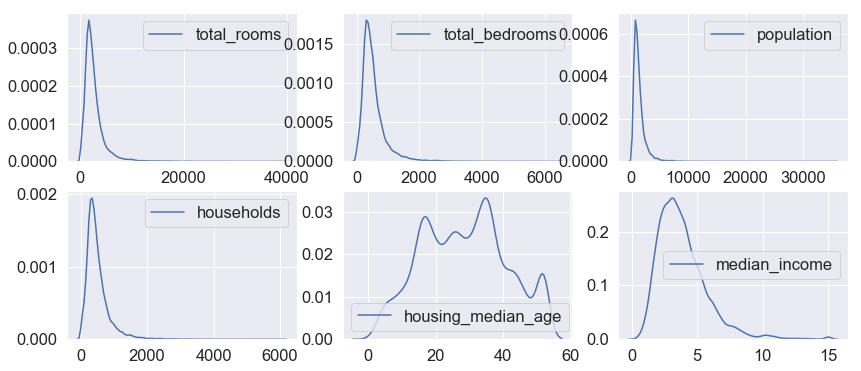

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,6))

sns.kdeplot(df['total_rooms'], ax=axes[0][0])
sns.kdeplot(df['total_bedrooms'], ax=axes[0][1])
sns.kdeplot(df['population'], ax=axes[0][2])
sns.kdeplot(df['households'], ax=axes[1][0])
sns.kdeplot(df['housing_median_age'], ax=axes[1][1])
sns.kdeplot(df['median_income'], ax=axes[1][2]);

In [98]:
# instantiate the scaler
scaler = MinMaxScaler()

In [99]:
x = df.drop(['median_house_value'], axis=1).values
y = df['median_house_value'].values

In [100]:
scaler.fit(x)

C:\Users\T846715\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [103]:
rescaledx= scaler.transform(x)
rescaledx

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.02055583, 0.53966842,
        0.75      ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.18697583, 0.53802706,
        0.75      ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.02894261, 0.46602805,
        0.75      ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.07104095, 0.08276438,
        0.25      ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.05722743, 0.09429525,
        0.25      ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.08699227, 0.13025338,
        0.25      ]])

# Split the data into 80% training dataset and 20% test dataset

In [105]:
x_train, x_test, y_train, y_test = train_test_split(rescaledx, y, random_state=1,test_size=0.2)

In [106]:
#default split is 75% for training and 25% for testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(16512, 9)
(16512,)
(4128, 9)
(4128,)


# Perform Linear Regression

 1. Perform Linear Regression on training data
 2. Predict output for test dataset using the filted model
 3. Print root mean squared error (RMSE) from Linear Regression

In [108]:
# instantiate
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(x_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
# Print the co-efficients
print(linreg.intercept_)
print(linreg.coef_)

369877.9770462146
[ -433547.29886104  -401741.9869206     59722.65493616  -281444.01030409
   573958.64916158 -1403283.7077195    433561.40505111   583340.14834304
    -3425.80780793]


In [111]:
feature_cols = df.drop(['median_house_value'], axis=1).columns

#pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('longitude', -433547.29886103974),
 ('latitude', -401741.98692059953),
 ('housing_median_age', 59722.65493615795),
 ('total_rooms', -281444.01030409196),
 ('total_bedrooms', 573958.6491615812),
 ('population', -1403283.7077195044),
 ('households', 433561.4050511112),
 ('median_income', 583340.1483430379),
 ('ocean_proximity', -3425.807807931988)]

In [112]:
# Making predictions
# make predictions on the testing set

y_pred = linreg.predict(x_test)

In [113]:
### STATSMODEL

# Print the R- squared value for the model

res.rsquared

NameError: name 'res' is not defined

In [115]:

x_train_add = sm.add_constant(x_train)

sm_model  = sm.OLS(y_train, x_train_add)

res = sm_model.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3223.
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        17:17:39   Log-Likelihood:            -2.0755e+05
No. Observations:               16512   AIC:                         4.151e+05
Df Residuals:                   16502   BIC:                         4.152e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.699e+05   7452.668     49.630      0.0

In [116]:

res.rsquared

0.6373833667145292

In [118]:
# Model evaluation metrices for regression

print('Mean Abs Error MAE   :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq Error MSE    :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE  :', metrics.r2_score(y_test, y_pred))


Mean Abs Error MAE   : 50879.51264240563
Mean Sq Error MSE    : 4877464158.050257
Root Mean Sq Error RMSE  : 0.628154440355327
